# COP Optimization for a Simple Vapor Recompression Cycle

In [1]:
from vapor_compression import SimpleVaporCompressionCycle

## Define the Refridgerant

In [2]:
vc = SimpleVaporCompressionCycle('R134a')

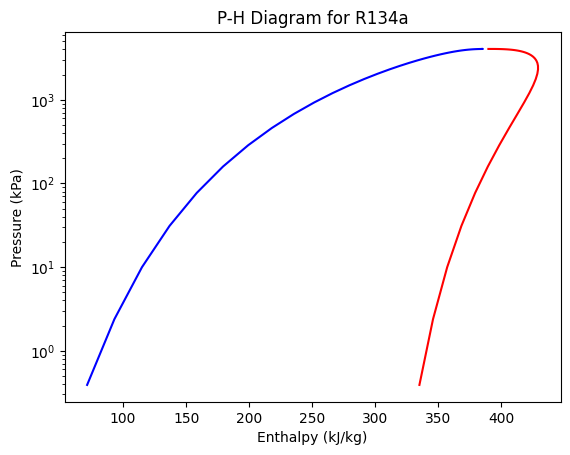

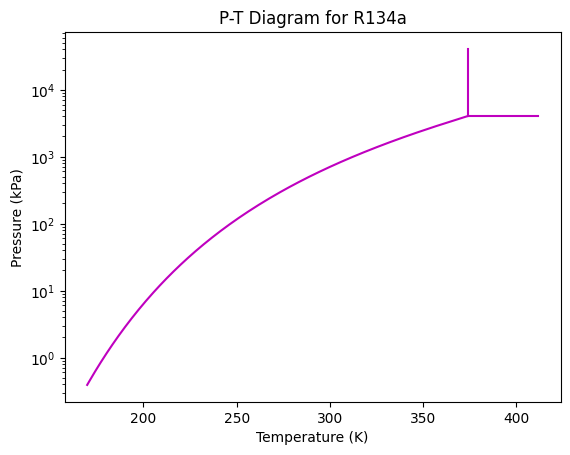

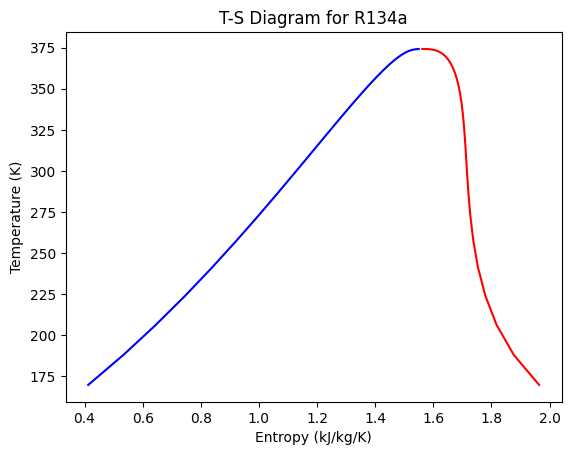

In [3]:
vc.draw_thermodynamic_diagrams()

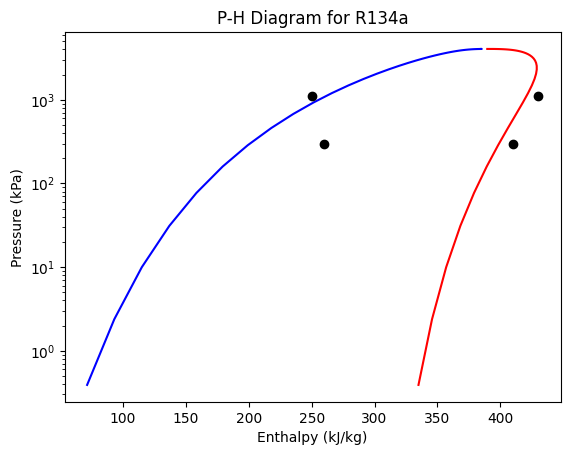

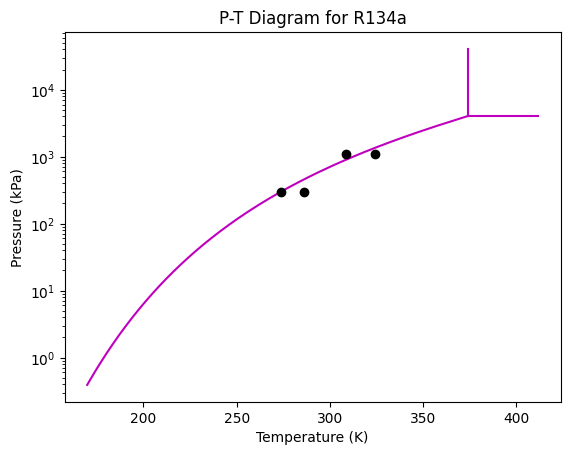

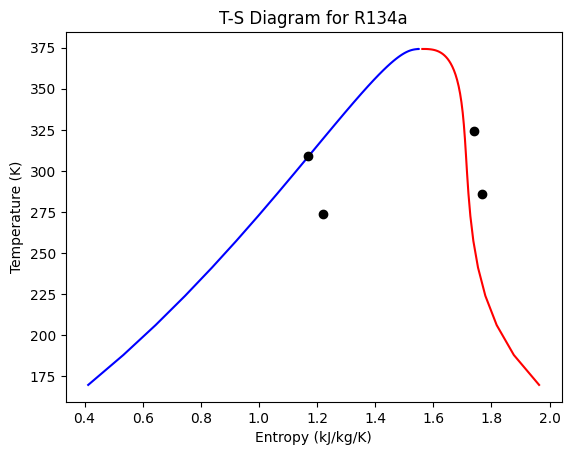

In [4]:
vc.specify_initial_conditions(enthalpy=[410,430,250,260], # kJ/kg
                                pressure=[300,1100,1100,300] # kPa
                                )

## Initialize

In [5]:
vc.initialize(verbose=True)


Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value      : Units : Fixed : Bounds
    Heat Duty : 2.0910e+05 :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     9.8008     9.8008
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     273.82     286.14
    P                          pascal 3.0000e+05 3.0000e+05
    Vapor Fraction      dimensionless     0.0000     1.0000
    Mass Enthalpy    joule / kilogram 2.0090e+05 4.1000e+05

Unit : fs.compressor                                                       Time: 0.0
-----------------------------------------------------------------------

### Optimize

In [ ]:
vc.set_specifications(
    low_side_pressure=(200, 300), # Pa
    high_side_pressure=(1000, 2000), # Pa
    evaporator_temperature=(-20, 10), # degC
    condenser_temperature=(30, 40), # degC
    subcooling = 0, # deg C
    superheating = 0 # deg C
)

# Still need to debug

vc.optimize_COP(verbose=True)

ERROR:pyomo.core:Rule failed when generating expression for Constraint fs.evaporator.subcooling_constraint with index None:
TypeError: unsupported operand type(s) for +: 'AMPLExternalFunction' and 'int'
ERROR:pyomo.core:Constructing component 'fs.evaporator.subcooling_constraint' from data=None failed:
    TypeError: unsupported operand type(s) for +: 'AMPLExternalFunction' and 'int'


TypeError: unsupported operand type(s) for +: 'AMPLExternalFunction' and 'int'

Optimized COP: 5.411


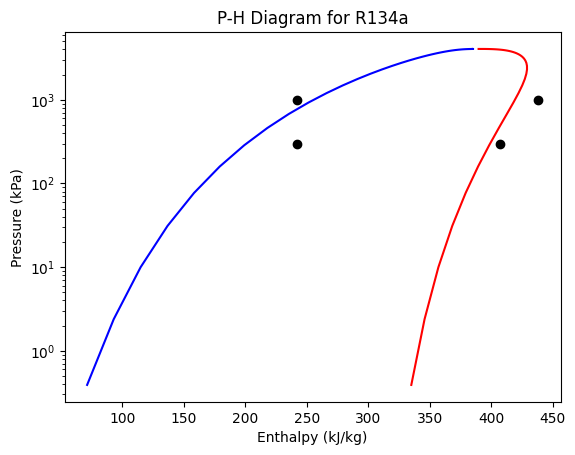

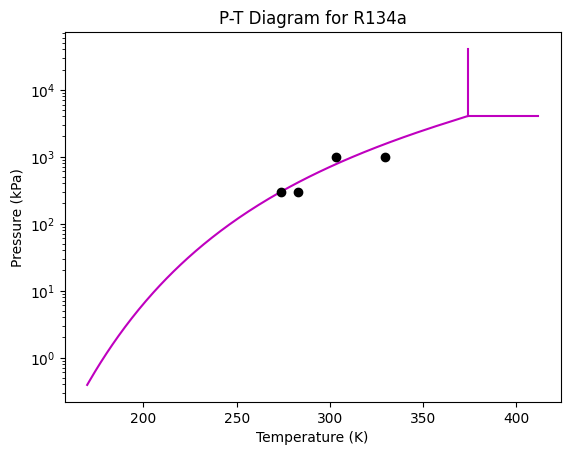

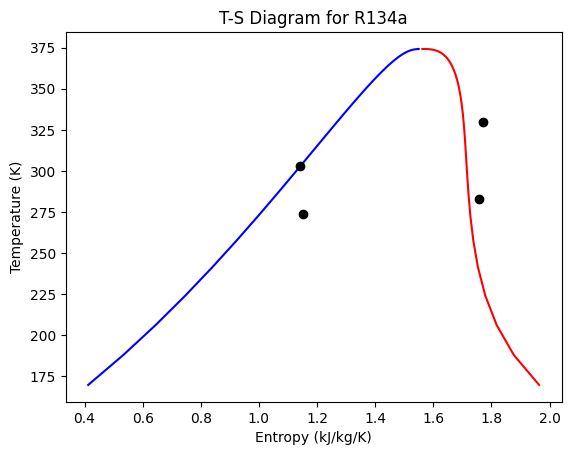


Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value      : Units : Fixed : Bounds
    Heat Duty : 1.6562e+05 :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     9.8008     9.8008
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     273.82     283.15
    P                          pascal 3.0000e+05 3.0000e+05
    Vapor Fraction      dimensionless    0.20603     1.0000
    Mass Enthalpy    joule / kilogram 2.4172e+05 4.0734e+05

Unit : fs.compressor                                                       Time: 0.0
-----------------------------------------------------------------------

In [ ]:
vc.report_solution()

In [ ]:
for i in dir(vc.model.fs.condenser.control_volume.properties_out[0]):
    print(i)

CONFIG
_BlockData__autoslot_mappers
_Block_reserved_words
_PPRINT_INDENT
__auto_slots__
__autoslot_mappers__
__class__
__deepcopy__
__deepcopy_field__
__deepcopy_state__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattr__
__getattribute__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__setstate__
__sizeof__
__slots__
__str__
__subclasshook__
__weakref__
_active
_bfs_iterator
_compact_decl_storage
_component
_component_data_iteritems
_component_data_itervalues
_component_typemap
_create_objects_for_deepcopy
_ctypes
_decl
_decl_order
_declare_reserved_components
_default_scaling_factors
_get_config_args
_get_default_prop_pack
_get_indexing_sets
_get_performance_contents
_get_property_package
_get_reaction_package
_get_stream_table_contents
_index
_lock_attribute_creation
_params
_pb_configured
_postfix_dfs_iterator
_pprint_base_impl
_pprint_blockdata_components
_prefix_df

In [ ]:
vc.model.fs.condenser.control_volume.properties_out[0].t_sat_func()

## Sensitivity Analysis

In [ ]:
run_sensitivity_analysis = False

if run_sensitivity_analysis:
    import numpy as np
    T_ambient = np.linspace(20, 31, 22)

    COP = np.zeros_like(T_ambient)

    for i, Ta in enumerate(T_ambient):
        vc.set_specifications(
            low_side_pressure=(200, 300), # Pa
            high_side_pressure=(1000, 2000), # Pa
            evaporator_temperature=(-30, -10), # degC
            condenser_temperature=(Ta+5, Ta+15), # degC
        )
        try:
            COP[i] = vc.optimize_COP(verbose=False, initialize=False)
        except:
            COP[i] = np.nan

In [ ]:
if run_sensitivity_analysis:

    import matplotlib.pyplot as plt
    plt.plot(T_ambient, COP, linewidth=3)
    plt.xlabel('Ambient temperature (°C)', fontsize=18)
    plt.ylabel('COP', fontsize=18)
    plt.title('Simple Vapor Compression with R134a', fontsize=18)
    plt.grid()
    plt.show()